(test-functions:bratley1992d)=
# Bratley et al. (1992) D function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The Bratley et al. (1992) D function (or `Bratley1992d` function for short),
is an $M$-dimensional scalar-valued function.
The function was introduced in {cite}`Bratley1992` as a test function
for multi-dimensional numerical integration using low discrepancy sequences.
It was used in {cite}`Kucherenko2009` and {cite}`Saltelli2010` in the context
of global sensitivity analysis.

```{note}
There are four other test functions used in Bratley et al. {cite}`Bratley1992`:

- {ref}`Bratley et al. (1992) A <test-functions:bratley1992a>`:
  A product of an absolute function 
- {ref}`Bratley et al. (1992) B <test-functions:bratley1992b>`:
  A product of a trigonometric function
- {ref}`Bratley et al. (1992) C <test-functions:bratley1992c>`:
  A product of the Chebyshev polynomial of the first kind
- {ref}`Bratley et al. (1992) D <test-functions:bratley1992d>`:
  A sum of product (_this function_)
  
The function was reintroduced in {cite}`Saltelli1995` with additional
parameters for global sensitivity analysis purposes.
The "generalized" function became known as the {ref}`Sobol'-G <test-functions:sobol-g>`. 
```

The plots for one-dimensional and two-dimensional `Bratley1992d` functions
are shown below.

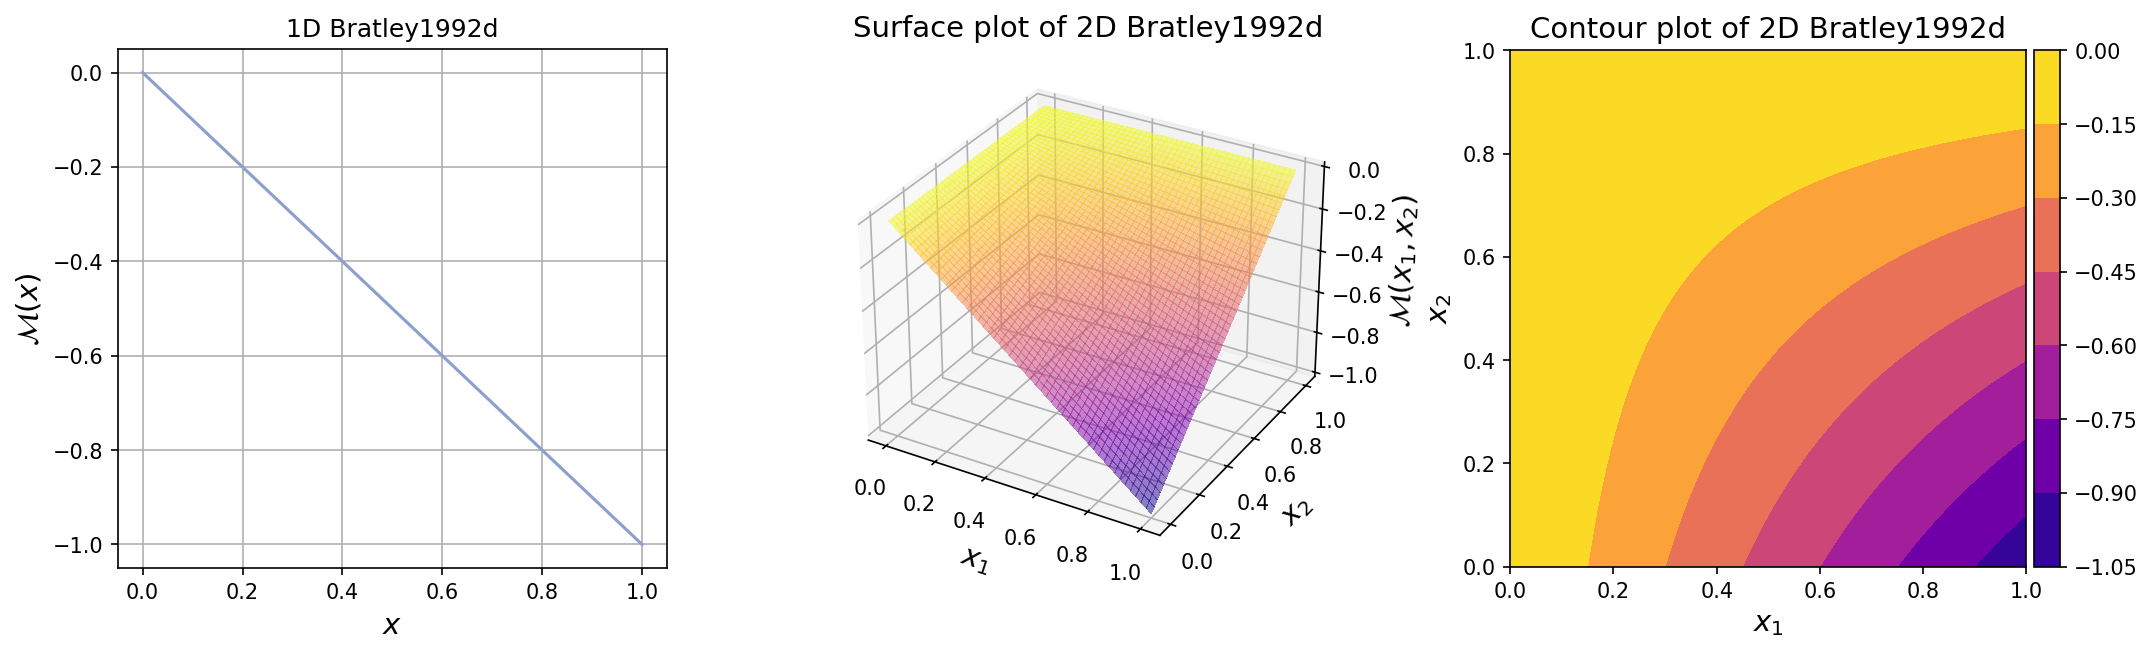

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- Create 1D data
my_bratley1992d_1d = uqtf.Bratley1992d(spatial_dimension=1)
xx_1d = np.linspace(0, 1, 1000)[:, np.newaxis]
yy_1d = my_bratley1992d_1d(xx_1d)

# --- Create 2D data
my_bratley1992d_2d = uqtf.Bratley1992d(spatial_dimension=2)
mesh_2d = np.meshgrid(xx_1d, xx_1d)
xx_2d = np.array(mesh_2d).T.reshape(-1, 2)
yy_2d = my_bratley1992d_2d(xx_2d)

# --- Create a series of plots
fig = plt.figure(figsize=(15, 5))

# 1D
axs_1 = plt.subplot(131)
axs_1.plot(xx_1d, yy_1d, color="#8da0cb")
axs_1.grid()
axs_1.set_xlabel("$x$", fontsize=14)
axs_1.set_ylabel("$\mathcal{M}(x)$", fontsize=14)
axs_1.set_title("1D Bratley1992d")

# Surface
axs_2 = plt.subplot(132, projection='3d')
axs_2.plot_surface(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000, 1000).T,
    cmap="plasma",
    linewidth=0,
    antialiased=False,
    alpha=0.5
)
axs_2.set_xlabel("$x_1$", fontsize=14)
axs_2.set_ylabel("$x_2$", fontsize=14)
axs_2.set_zlabel("$\mathcal{M}(x_1, x_2)$", fontsize=14)
axs_2.set_title("Surface plot of 2D Bratley1992d", fontsize=14)

# Contour
axs_3 = plt.subplot(133)
cf = axs_3.contourf(
    mesh_2d[0], mesh_2d[1], yy_2d.reshape(1000, 1000).T, cmap="plasma"
)
axs_3.set_xlabel("$x_1$", fontsize=14)
axs_3.set_ylabel("$x_2$", fontsize=14)
axs_3.set_title("Contour plot of 2D Bratley1992d", fontsize=14)
divider = make_axes_locatable(axs_3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(cf, cax=cax, orientation='vertical')
axs_3.axis('scaled')

fig.tight_layout(pad=3.0)
plt.gcf().set_dpi(150);

## Test function instance

To create a default instance of the test function:

In [3]:
my_testfun = uqtf.Bratley1992d()

Check if it has been correctly instantiated:

In [4]:
print(my_testfun)

Name              : Bratley1992d
Spatial dimension : 2
Description       : Integration test function #4 from Bratley et al. (1992)


By default, the spatial dimension is set to $2$[^default_dimension].
To create an instance with another value of spatial dimension,
pass an integer to the parameter `spatial_dimension` (keyword only).
For example, to create an instance of 10-dimensional `Bratley1992d` function,
type:

In [5]:
my_testfun = uqtf.Bratley1992d(spatial_dimension=10)

## Description

The `Bratley1992d` function is defined as follows[^location]:

$$
\mathcal{M}(\boldsymbol{x}) = \sum_{m = 1}^{M} (-1)^m \prod_{i = 1}^{m} x_m,
$$

where $\boldsymbol{x} = \{ x_1, \ldots, x_M \}$
is the $M$-dimensional vector of input variables further defined below.

## Probabilistic input

Based on {cite}`Bratley1992`, the test function is integrated over the 
hypercube domain of $[0, 1]^M$. This specification was adopted in
the application of the function as global sensitivity analysis test functions
(see {cite}`Kucherenko2009, Saltelli2010`).

Such an input specification can be modeled using an $M$ independent uniform
random variables as shown in the table below.

| No.       |  Name    |  Distribution | Parameters | Description |
|:---------:|:--------:|:-------------:|:----------:|:-----------:|
|  1        | $x_1$    | uniform       | [0.0 1.0]  |     N/A     |
|  $\vdots$ | $\vdots$ | $\vdots$      | $\vdots$   |  $\vdots$   |
|  M        | $x_M$    | uniform       | [0.0 1.0]  |     N/A     |


## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Definite integration

The integral value of the function over the domain of $[0.0, 1.0]^M$
is analytical:

$$
I[\mathcal{M}] (M) \equiv \int_{[0, 1]^M} \mathcal{M}(\boldsymbol{x}) \; d\boldsymbol{x} = - \frac{1}{3} \left( 1 - \left( - \frac{1}{2} \right)^M \right).
$$

### Moments

The moments of the test function are analytically known
and the first two moments are given below.

#### Expected value

Due to the domain being a hypercube,
the above integral value over the domain is the same as the expected value:

$$
\mathbb{E}[\mathcal{M}](M) = - \frac{1}{3} \left( 1 - \left( - \frac{1}{2} \right)^M \right).
$$

#### Variance

The analytical value for the variance {cite}`Saltelli2010` is given as:

$$
\mathbb{V}[\mathcal{M}](M) = \frac{1}{10} \left(\frac{1}{3}\right)^M + \frac{1}{18} - \frac{1}{9} \left( \frac{1}{2} \right)^{2M} + (-1)^{M+1} \frac{2}{45} \left( \frac{1}{2} \right)^M
$$

### Sensitivity analysis

Some sensitivity measures of the test function are known analytically;
they make the function ideal for testing sensitivity analysis methods.

#### Total-effect Sobol' indices

The total-effect Sobol' indices for the input variable $m$
is given below as a function of the total number of dimensions $M$:

$$
ST_m(M) = \frac{\mathbb{E}[\mathcal{M}^2](M) - E(m) - \frac{1}{4} (T_1(m, M) - 2 T_2(m, M) + T_3(m, M)) - T_4(m, M) - T_5(m, M)}{\mathbb{V}[\mathcal{M}](M)},
$$

where:

- $\mathbb{E}[\mathcal{M}^2](M) = \frac{1}{6} \left( 1 - \left( \frac{1}{3} \right)^M \right) + \frac{4}{15} \left( (-1)^{M+1} \left( \frac{1}{2} \right)^M + \left(\frac{1}{3} \right)^M \right)$
- $E(m) = \frac{1}{6} \left( 1 - \left( \frac{1}{3} \right)^{m-1} \right) + \frac{4}{15} \left( (-1)^{m} \left( \frac{1}{2} \right)^{m-1} + \left(\frac{1}{3} \right)^{m-1} \right)$
- $T_1(m, M) = \frac{1}{2} \left( \frac{1}{3} \right)^{m-2} \left( 1 - \left( \frac{1}{3} \right)^{M - m + 1} \right)$
- $T_2(m, M) = \frac{1}{2} \left( \left( \frac{1}{3} \right)^{m-1} - \left( \frac{1}{3} \right)^M \right)$
- $T_3(m, M) = \frac{3}{5} \left( 4 \left( \frac{1}{3} \right)^{M+1} + (-1)^{m+M} \left( \frac{1}{2} \right)^{M - m - 1} \left( \frac{1}{3} \right)^m \right)$
- $T_4(m, M) = \frac{1}{5} \left( (-1)^{m+1} \left( \frac{1}{3} \right) \left( \frac{1}{2} \right)^{m - 3} - 4 \left( \frac{1}{3} \right)^m \right)$
- $T_5(m, M) = \frac{1}{5} \left( (-1)^{M+1} \left( \frac{1}{3} \right) \left( \frac{1}{2} \right)^{M-2} + (-1)^{M + m - 1} \left( \frac{1}{3} \right)^m \left( \frac{1}{2} \right)^{M - m - 1} \right)$
- $\mathbb{V}[\mathcal{M}](M)$ is the variance of the function as given in the previous section.

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```

[^location]: see Section 5.1, p. 207 (test function no. 4)
in {cite}`Bratley1992`.

[^default_dimension]: This default dimension applies to all variable dimension
test functions. It will be used if the `spatial_dimension` argument is not given.